In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
!wget -O data/FuelConsumption.csv http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-11 13:15:50--  http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'data/FuelConsumption.csv'

data/FuelConsumptio 100%[===================>]  70.93K   400KB/s    in 0.2s    

2020-02-11 13:15:51 (400 KB/s) - 'data/FuelConsumption.csv' saved [72629/72629]



In [4]:
# FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated
# carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

df = pd.read_csv( "data" + os.path.sep + "FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


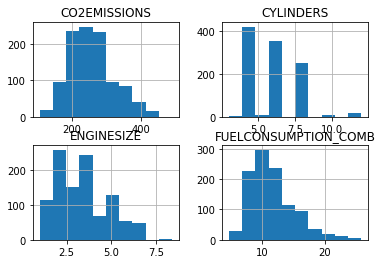

In [7]:
# Get several selected features and plot their distribution
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()
cdf.hist()
plt.show()

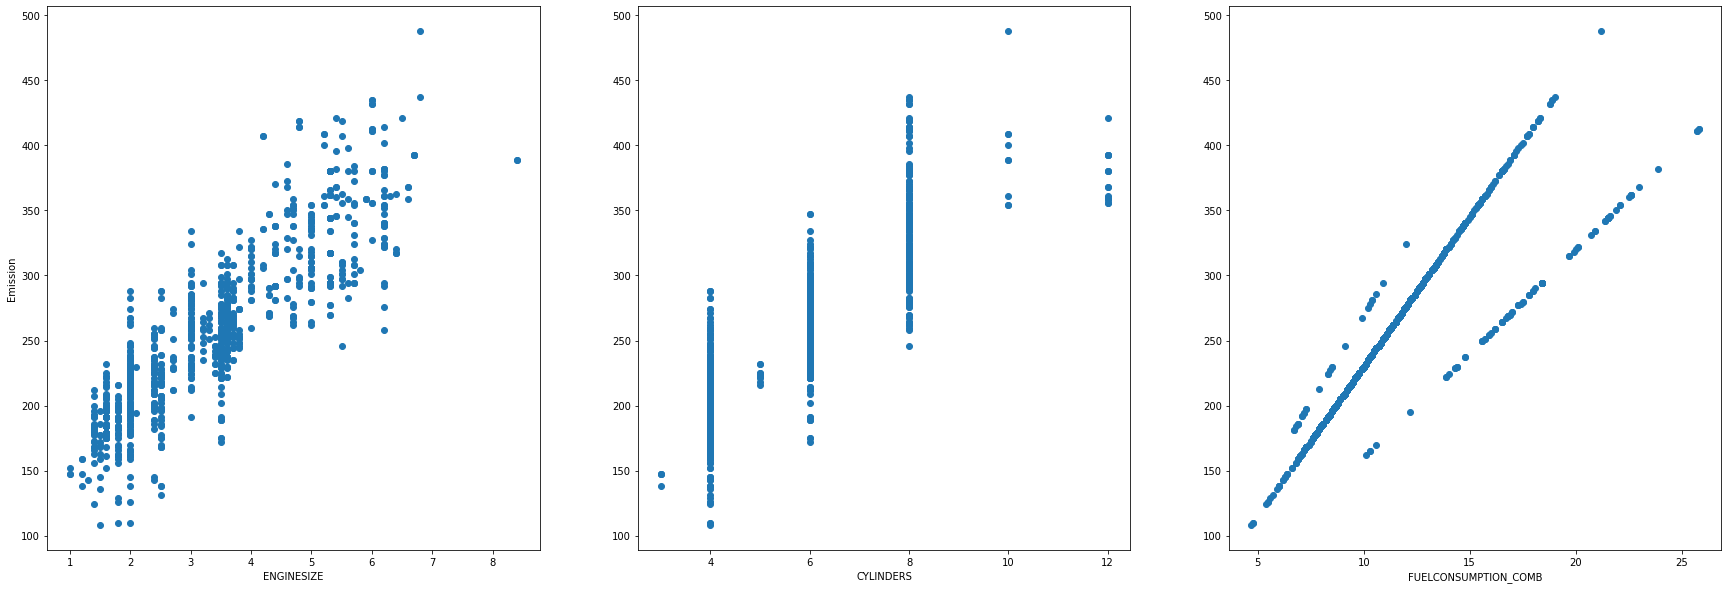

In [29]:
# Use scatter plot to see the dependency of the Co2 emissions from them

fig = plt.figure(figsize = (30, 10))

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(x = cdf['ENGINESIZE'], y = cdf['CO2EMISSIONS'])
ax1.set_xlabel("ENGINESIZE")
ax1.set_ylabel("Emission")

ax2 = fig.add_subplot(1,3,2)
ax2.scatter(x = cdf['CYLINDERS'], y = cdf['CO2EMISSIONS'])
ax2.set_xlabel("CYLINDERS")

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(x = cdf['FUELCONSUMPTION_COMB'], y = cdf['CO2EMISSIONS'])
ax3.set_xlabel("FUELCONSUMPTION_COMB")

plt.show()


In [35]:
# Creating train and test dataset
print('Length of df is: ', len(cdf), ', shape: ', cdf.shape)

# Generate a Mask array with about 80% true and 20% false values
mask = np.random.rand(len(df)) < 0.8

# Make the 80% train data
train_data = cdf[mask]

# Make the 20% test data
test_data = cdf[~mask]

print('Train data size: ', len(train_data), ', test data size: ', len(test_data))


Length of df is:  1067 , shape:  (1067, 4)
Train data size:  843 , test data size:  224


In [39]:
# Train the linear model on the data
lm = linear_model.LinearRegression()

train_x = np.asanyarray(train_data[['ENGINESIZE']])
train_y = np.asanyarray(train_data[['CO2EMISSIONS']])

lm.fit(train_x, train_y)

print('Linear model intercept: ', lm.intercept_, ', coeff: ', lm.coef_)

Linear model intercept:  [124.36518666] , coeff:  [[39.48899227]]


Text(0.5, 1.0, 'The regression line on the training data')

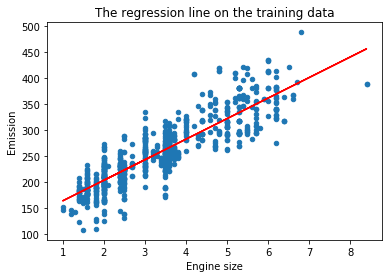

In [50]:
#Scatter plot the training data plis the regression line on this data
train_data[['ENGINESIZE','CO2EMISSIONS']].plot(kind='scatter', x = 'ENGINESIZE', y = 'CO2EMISSIONS')
plt.plot(train_x, lm.coef_[0]*train_x + lm.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title('The regression line on the training data')

Text(0.5, 1.0, 'The regression line on the testing data')

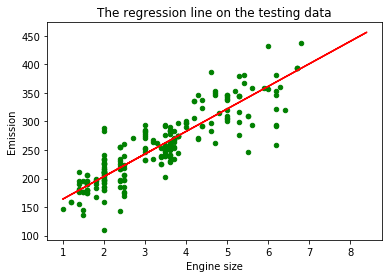

In [51]:
# Evaluate the model on the testing set first just plot the testing data with the regression line
test_data[['ENGINESIZE','CO2EMISSIONS']].plot(kind='scatter', x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'green')
plt.plot(train_x, lm.coef_[0]*train_x + lm.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title('The regression line on the testing data')

In [61]:
# Predict the values on the testing set and compute the R2 score
test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])

test_y_hat = lm.predict(test_x)

# There are different model evaluation metrics, based on the test set:

# -----------------------
# - Mean absolute error:
#       It is the mean of the absolute value of the errors.
#       This is the easiest of the metrics to understand 
#       since it’s just average error.
print("Mean Absolute Error (MAE): %.2f" % np.mean(np.abs(test_y_hat - test_y)))

# -----------------------
# - Mean Squared Error (MSE):
#        It is the mean of the squared error. It’s more popular than 
#        Mean absolute error because the focus is geared more towards
#        large errors. This is due to the squared term exponentially 
#        increasing larger errors in comparison to smaller ones.
print("Mean Squared Error (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))

# -----------------------
# - Root Mean Squared Error (RMSE). - R-squared
#        It is not an error, but is a popular metric for accuracy of
#        your model. It represents how close the data are to the fitted 
#        regression line. The higher the R-squared, the better the model 
#        fits your data. Best possible score is 1.0 and it can be negative 
#        (because the model can be arbitrarily worse).
print('The Root Mean Squared Error (RMSE): %.2f' % r2_score(test_y, test_y_hat))

Mean Absolute Error (MAE): 22.03
Mean Squared Error (MSE): 866.78
The Root Mean Squared Error (RMSE): 0.77


In [82]:
# Multiple Linear Regression will require a larger set of predictors
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# Split the data
mask = np.random.rand(len(cdf)) < 0.8
train_data = cdf[mask]
test_data = cdf[~mask]

#We can use the same class 
mlm = linear_model.LinearRegression()

train_data_x = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']


train_x = np.asanyarray(train_data[train_data_x])
train_y = np.asanyarray(train_data['CO2EMISSIONS'])

mlm.fit(train_x, train_y)

print('Multiple linear regression intercept: ',  mlm.intercept_, ' coefficients: ', mlm.coef_)

Multiple linear regression intercept:  66.36241633509565  coefficients:  [12.11298892  7.13751084  9.29596546]


In [86]:
# Predict the values from the multiple linear regression model

test_x = np.asanyarray(test_data[train_data_x])
test_y = np.asanyarray(test_data['CO2EMISSIONS'])

test_y_hat = mlm.predict(test_x)

print("Residual sum of squares: %.2f" % np.mean((test_y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
# score - return the coefficient of determination, 
# i.e. the R^2 of the prediction.
print('Variance score: %.2f' % mlm.score(test_x, test_y))

# Explained variance regression score: R^2/R-square
# If 𝑦̂ is the estimated target output, y the corresponding (correct) 
# target output, and Var is Variance, the square of the standard 
# deviation, then the explained variance is estimated as follow:
# 
# 𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦}
#
# The best possible score is 1.0, lower values are worse.

Residual sum of squares: 532.42
Variance score: 0.87


In [90]:
# Try to use a multiple linear regression with the same
# dataset but this time use __FUEL CONSUMPTION in CITY__ 
# and __FUEL CONSUMPTION in HWY__ instead of
# FUELCONSUMPTION_COMB. Does it result in better accuracy?

predictors = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']
train_x = np.asanyarray(train_data[predictors])
train_y = np.asanyarray(train_data['CO2EMISSIONS'])

mlm = linear_model.LinearRegression()

mlm.fit(train_x, train_y)


test_x = np.asanyarray(test_data[predictors])
test_y = np.asanyarray(test_data['CO2EMISSIONS'])

print('R^2 score: %.2f' % mlm.score(test_x, test_y))

# The explained variance score is the same 0.87 as before


R^2 score: 0.87


In [91]:
# -----------------------
# - Root Mean Squared Error (RMSE)
#   Is the square root of the mean squared error.
#   This is one of the most popular of the evaluation
#   metrics because Root Mean Squared Error is interpretable 
#   in the same units as the response vector (or ‘y’ units)
#   making it easy to relate its information.

# -----------------------
# - Relative Absolute Error (RAE),
# - Residual sum of square
#   Takes the total absolute error and normalizes it by 
#   dividing by the total absolute error of the simple predictor.

# -----------------------
# - Relative Squared Error (RSE)
#   Is very similar to “Relative absolute error “, but is widely
#   adopted by the data science community, as it is used for
#   calculating R-squared.

# -----------------------
# - R-squared is not error ( = 1 - RSE )
#   Is a popular metric for the accuracy of your model.
#   It represents how close the data values are to the 
#   fitted regression line. The higher the R-squared, 
#   the better the model fits your data.


#######################################################
# The choice of metric completely depends on the type
# of model, your data type, and domain of knowledge.

In [153]:
def plot_function_with_noise(func, noize_coef, x = np.arange(-5.0, 5.0, 0.1)) :
    y = func(x)
    y_noise = noize_coef * np.random.normal(size=x.size)
    ydata = y + y_noise
    plt.figure(figsize=(8,6))
    plt.plot(x, ydata,  'bo')
    plt.plot(x,y, 'r') 
    plt.ylabel('Dependent Variable')
    plt.xlabel('Indepdendent Variable')
    plt.show()

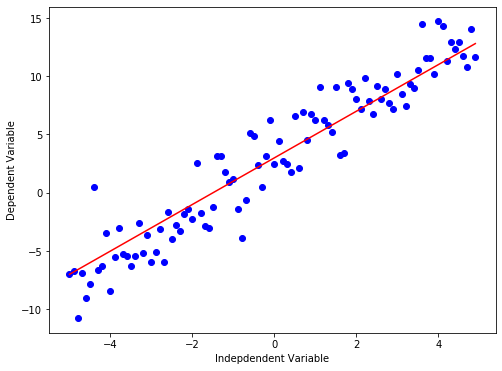

In [154]:
# Introduce a linear equation with some noize
plot_function_with_noise(lambda x: 2*(x) + 3, 2)

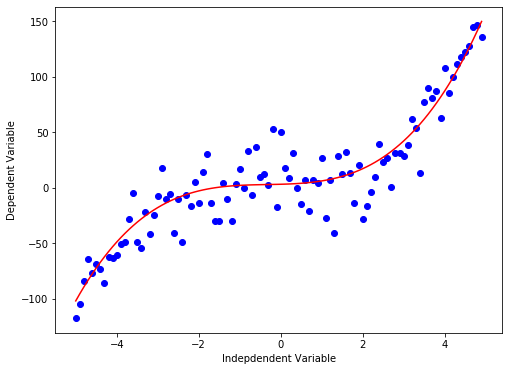

In [155]:
# We can also plot polynomial function with some noize
plot_function_with_noise(lambda x: 1*(x**3) + 1*(x**2) + 1*x + 3, 20)

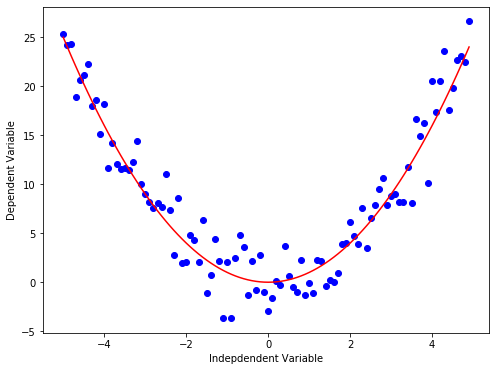

In [156]:
# We can also plot quadratic function with some noize
plot_function_with_noise(lambda x: np.power(x,2), 2)

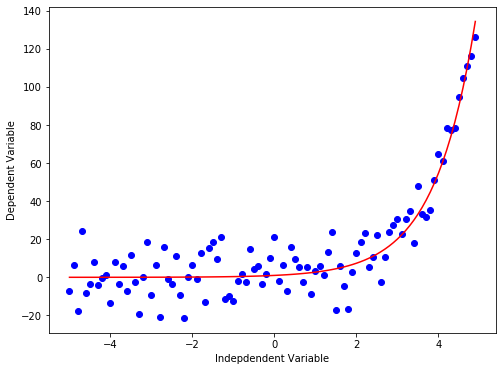

In [158]:
# We can also plot exponential function with some noize
plot_function_with_noise(lambda x: np.exp(x), 10)

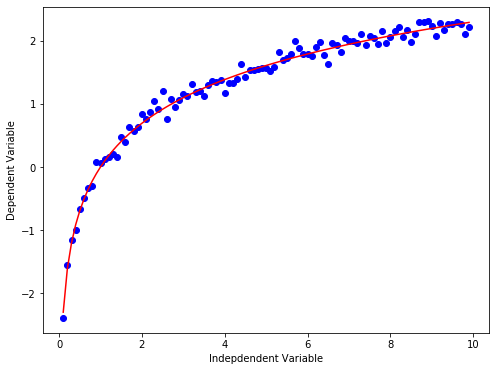

In [160]:
# We can also plot logarithmic function with some noize
plot_function_with_noise(lambda x: np.log(x), 0.1, x = np.arange(0.1, 10.0, 0.1))

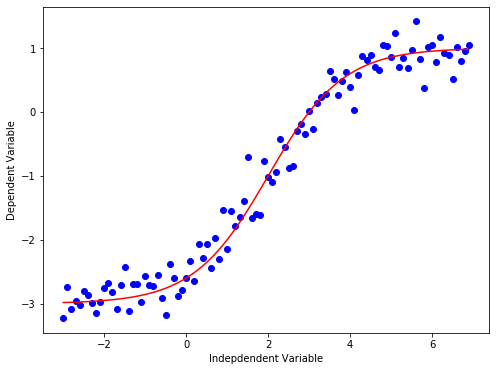

In [176]:
# We can also plot sigmoidal/logistic function with some noize
plot_function_with_noise(lambda x: 1-4/(1+np.power(3, x-2)), 0.25, x = np.arange(-3.0, 7.0, 0.1))

In [177]:
# Download the China GDP dataset
!wget -nv -O data/china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("data" + os.path.sep + "china_gdp.csv")
df.head(10)

2020-02-11 17:02:19 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "data/china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


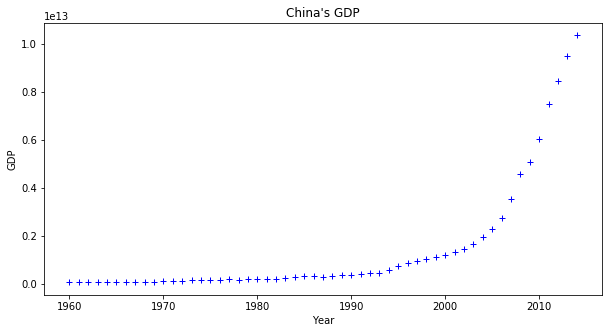

In [143]:
plt.figure(figsize = (10, 5))

data_x, data_y = (df.Year.values, df.Value.values)

plt.plot(data_x, data_y, 'b+')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('China\'s GDP')
plt.show()

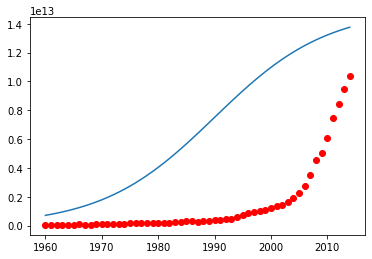

In [147]:
# From an initial look at the plot, we determine that the logistic function 
# could be a good approximation, since it has the property of starting with
# a slow growth, increasing growth in the middle, and then decreasing again
# at the end. Let's build our regression model and initialize its parameters. 

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1990.0

#logistic function
data_y_hat = sigmoid(data_x, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(data_x, data_y_hat * 15000000000000.)
plt.plot(data_x, data_y, 'ro')


In [149]:
# Let's normalize our data
data_x_n = data_x/max(data_x)
data_y_n = data_y/max(data_y)

In [196]:
# Use curve_fit which uses non-linear least squares to fit
# our sigmoid function, to data. Optimal values for the
# parameters so that the sum of the squared residuals of
# sigmoid(xdata, *popt) - ydata is minimized.
popt, pcov = curve_fit(sigmoid, data_x_n, data_y_n)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


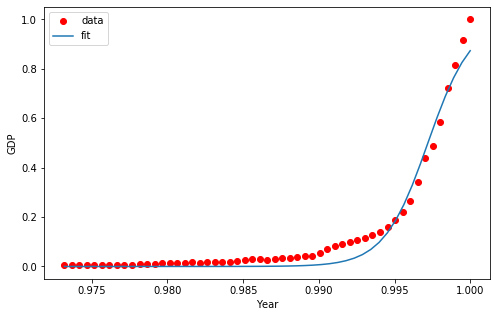

In [197]:
# Plot the data plus the fit regression plot
plt.figure(figsize=(8,5))
plt.plot(data_x_n, data_y_n, 'ro', label='data')

x = np.linspace(data_x.min(), data_x.max())
x = x / max(x)

plt.plot(x, sigmoid(x, *popt), label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

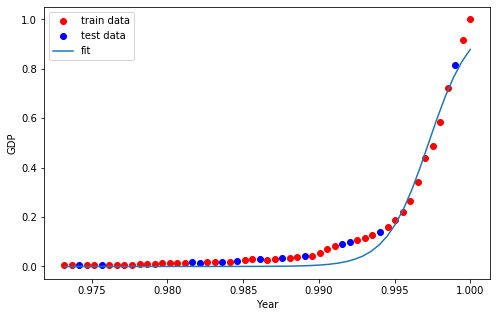

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96


In [204]:
# Calculate what is the accuracy of our model:
mask = np.random.rand(len(df)) < 0.8

max_x = df.Year.max()
max_y = df.Value.max()

train_data = df[mask]
test_data = df[~mask]

train_x = np.asanyarray(train_data.Year) / max_x
train_y = np.asanyarray(train_data.Value) / max_y

popt, pcov = curve_fit(sigmoid, train_x, train_y)

test_x = np.asanyarray(test_data.Year) / max_x
test_y = np.asanyarray(test_data.Value) / max_y

test_y_hat = sigmoid(test_x, *popt)

plt.figure(figsize=(8,5))
plt.plot(train_x, train_y, 'ro', label='train data')
plt.plot(test_x, test_y, 'bo', label='test data')

x = np.linspace(df.Year.min(), df.Year.max()) / max_x

plt.plot(x, sigmoid(x, *popt), label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )
